In [48]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

<strong style="color:rgb(51, 241, 255);">Feature Extraction</strong>

In [49]:
# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=60).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result=np.hstack((result, mel))
        return result

In [50]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

# Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [51]:
# Load data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\zen\\Documents\\codage\\python\\Speech Recognition\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [52]:
# Split the dataset
x_train, x_test, y_train, y_test = load_data(test_size=0.25)

In [53]:
# shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [54]:
# number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 200


<strong style="color:rgb(51, 241, 255);">Multi Layer Perceptron Classifier</strong>

In [55]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [56]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [57]:
# Predict for the test set
y_pred=model.predict(x_test)

In [58]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.69%


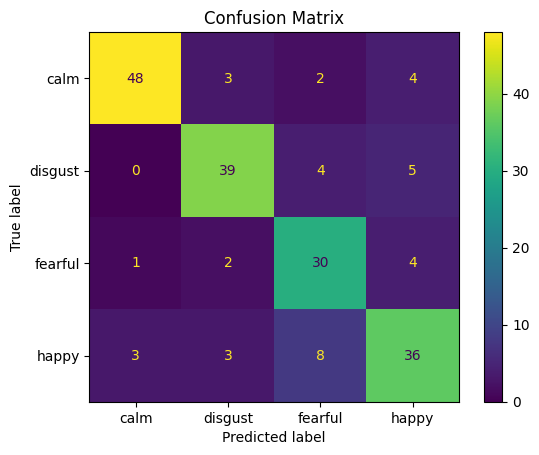

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.92      0.84      0.88        57
     disgust       0.83      0.81      0.82        48
     fearful       0.68      0.81      0.74        37
       happy       0.73      0.72      0.73        50

    accuracy                           0.80       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.80      0.80      0.80       192



In [61]:
for i in range(5):
    print(f"Prediction: {y_pred[i]}, Actual: {y_test[i]}")

Prediction: happy, Actual: happy
Prediction: fearful, Actual: calm
Prediction: happy, Actual: happy
Prediction: happy, Actual: happy
Prediction: disgust, Actual: disgust


<strong style="color:rgb(51, 241, 255);">Save Model</strong>

In [62]:
import joblib

joblib.dump(model, 'speech_emotion_recognition_model.pkl')

['speech_emotion_recognition_model.pkl']